## Remainders for Two Modulo Values

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Draw pairs of remainders mod a and mod b on a coordinate plane.
def plot_pairs(a, b):
    n = a * b
    plt.plot([i % a for i in range(n)], [i % b for i in range(n)],
            color='green', linestyle='dashed', linewidth=3,
            marker='o', markerfacecolor='blue', markersize=12)

    plt.axis('square')
    plt.xlim(-1, a)
    plt.ylim(-1, b)
    plt.xlabel(f'm mod {a}')
    plt.ylabel(f'm mod {b}')

    plt.savefig(f'crt-{a}-{b}.png')

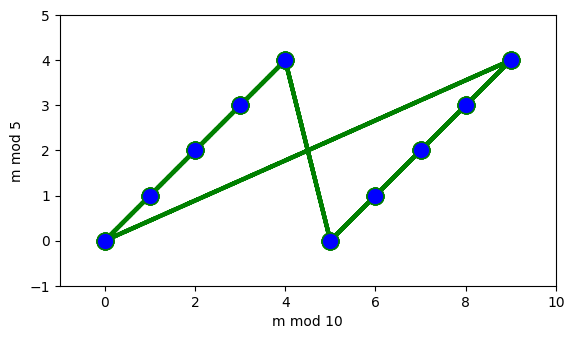

In [3]:
plot_pairs(10, 5)

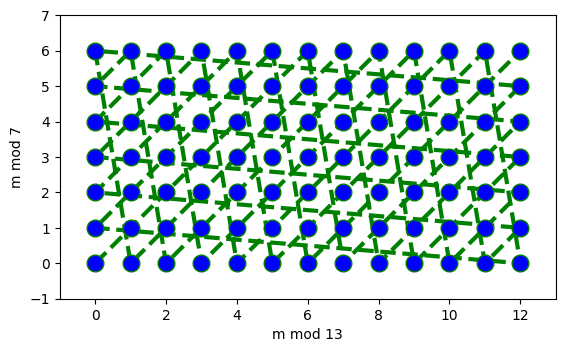

In [4]:
plot_pairs(13, 7)

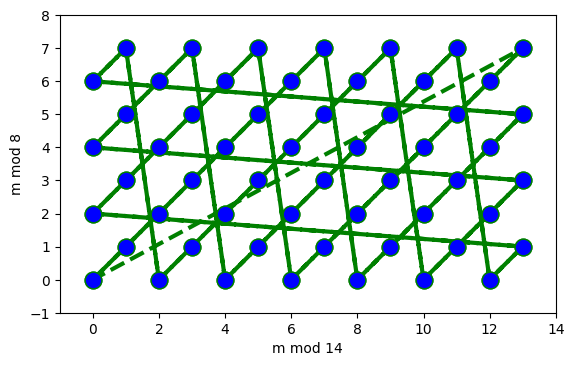

In [5]:
plot_pairs(14, 8)

## Chinese Remainder Theorem

In [2]:
from sympy import gcdex

In [3]:
# Given a, u, b, v; find and return m (if it exists).
def chinese_remainder_theorem(n1, r1, n2, r2):
    x, y, d = gcdex(n1, n2)
    assert n1 * x + n2 * y == d  # == gcd(n1, n2)
    y = -y
    assert n1 * x - n2 * y == d
    assert (r2 - r1) % d == 0
    x *= (r2-r1) // d
    y *= (r2-r1) // d
    assert n1 * x - n2 * y == r2 - r1
    return (n1 * x+r1) % (n1 * n2)

In [4]:
examples = (
    (5, 3, 12, 7),
    (10, 3, 13, 8),
    (10, 3, 14, 1),
    (10, 3, 14, 2)
)

In [5]:
for n1, r1, n2, r2 in examples:
    result = chinese_remainder_theorem(n1, r1, n2, r2)
    print(f'If x={r1} mod {n1} and x={r2} mod {n2}, then x={result}')

If x=3 mod 5 and x=7 mod 12, then x=43
If x=3 mod 10 and x=8 mod 13, then x=73
If x=3 mod 10 and x=1 mod 14, then x=113


AssertionError: 